# Normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('csv/wine_data.csv', usecols=[0, 1, 2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.sample(10)

,Class label,Alcohol,Malic acid
81,2,12.08,1.13
173,3,13.40,3.91
104,2,12.42,2.55
105,2,12.25,1.73
156,3,12.45,3.03
48,1,13.94,1.73
49,1,13.05,1.73
122,2,13.05,5.80
146,3,12.87,4.61
12,1,14.75,1.73


<Axes: xlabel='Alcohol', ylabel='Density'>

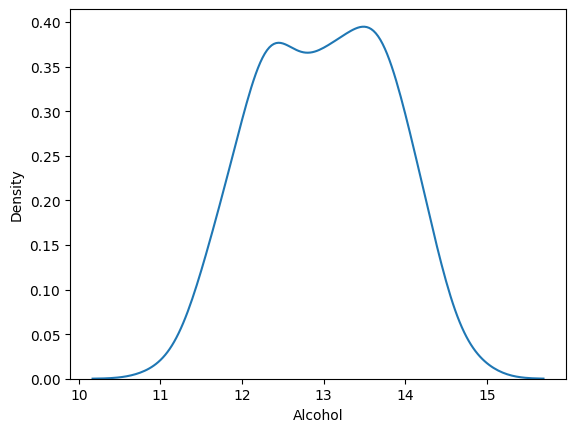

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

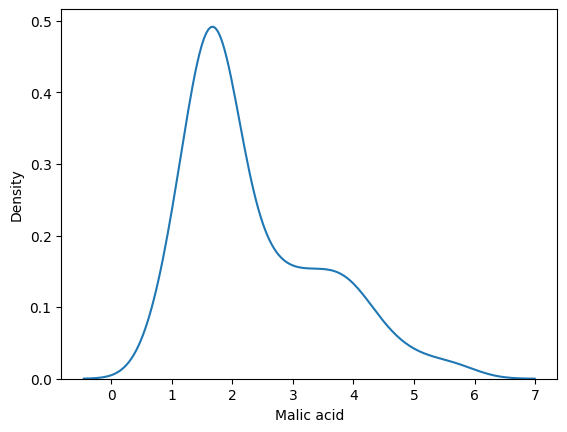

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

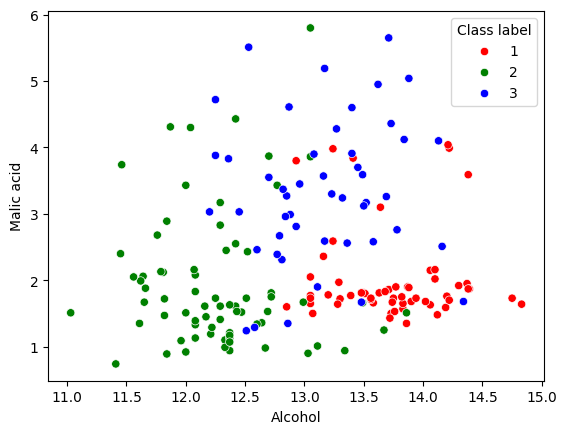

In [7]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

## Train test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

## MinMax Scalar

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scalar=MinMaxScaler()

#fit the scalar to the train set, it will learn the parameters
scalar.fit(x_train)

#transform train and test sets
x_train_scaled=scalar.transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [12]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled

,Alcohol,Malic acid
0,0.489247,0.144603
1,0.155914,0.093686
2,0.602151,0.690428
3,0.572581,0.545825
4,0.661290,0.156823
...,...,...
118,0.397849,0.171079
119,0.620968,0.010183
120,0.467742,0.517312
121,0.825269,0.230143


In [13]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [14]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


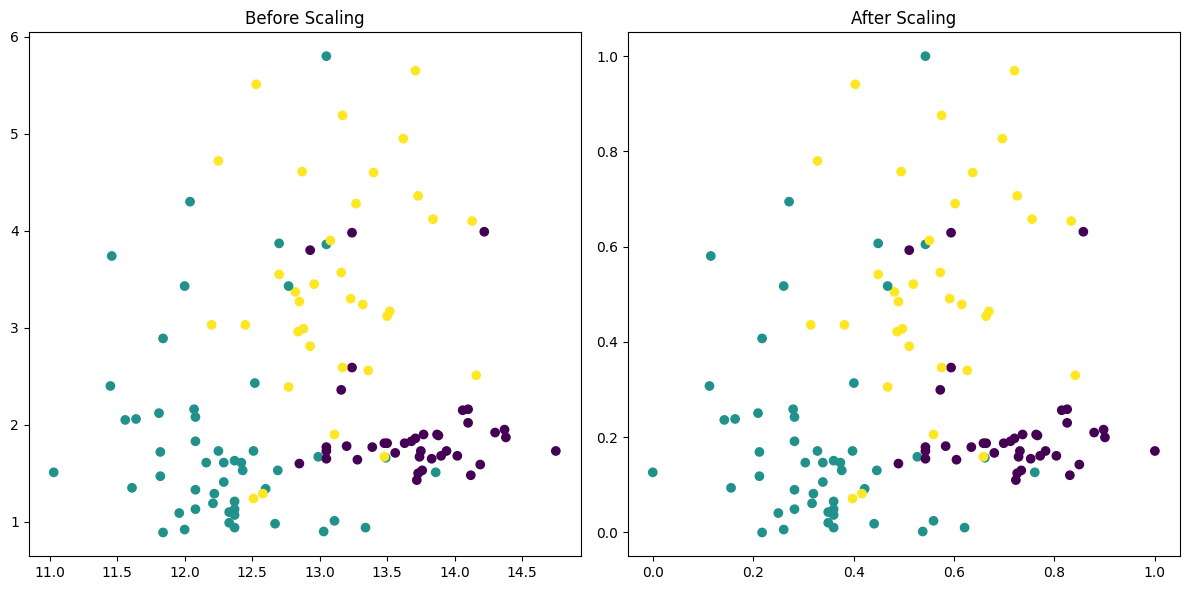

In [20]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))

ax1.scatter(x=x_train['Alcohol'], y=x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(x=x_train_scaled['Alcohol'], y=x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")

plt.tight_layout()
plt.show()

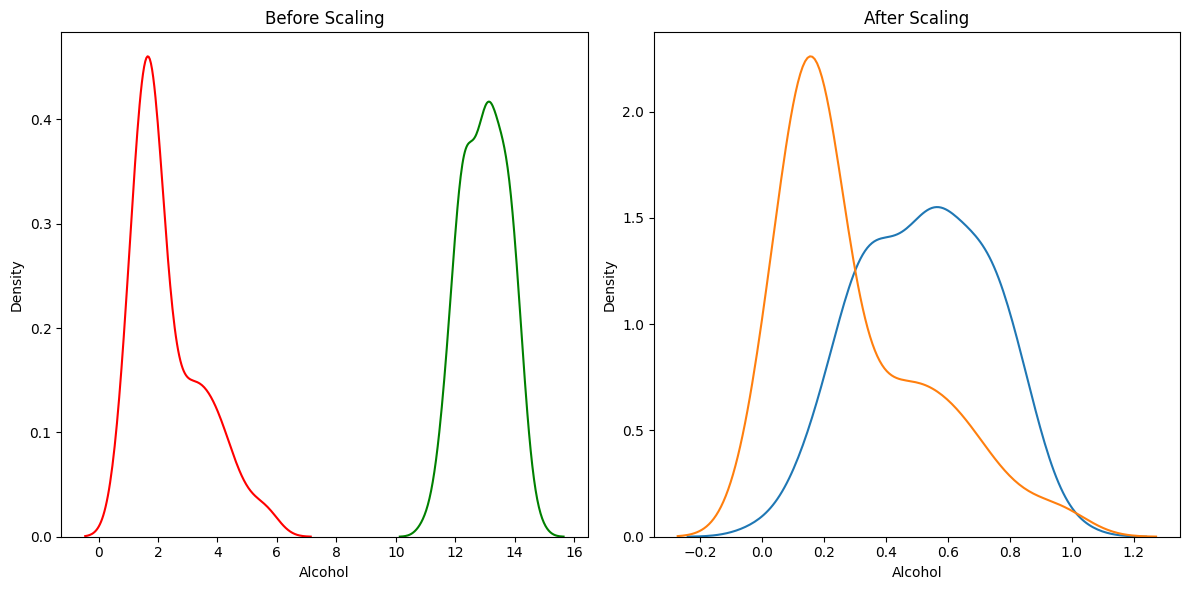

In [24]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))


ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1,color='green')
sns.kdeplot(x_train['Malic acid'],ax=ax1,color='red')

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)

plt.tight_layout()
plt.show()